# HỌC MÁY – THỰC HÀNH

## BÀI THỰC HÀNH PHẦN ỨNG DỤNG MẠNG CNN CHO BÀI TOÁN PHÂN LOẠI

### Ví dụ 1. Phân loại ảnh Chó – Mèo bằng CNN sử dụng thư viện Keras TensorFlow.


#### 1. Chuẩn bị hệ thống


#### 2. Chuẩn bị dữ liệu


In [1]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-04-11 16:30:35--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.96.128, 108.177.119.128, 142.250.153.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.96.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  28.4MB/s    in 2.3s    

2023-04-11 16:30:38 (28.4 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import zipfile

# Unzip the archive
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [3]:
import os

base_dir = 'cats_and_dogs_filtered'
# Change the base_dir to where you put dataset
print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['validation', 'vectorize.py', 'train']

Contents of train directory:
['dogs', 'cats']

Contents of validation directory:
['dogs', 'cats']


In [4]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))


Contents of train directory:
['dogs', 'cats']

Contents of validation directory:
['dogs', 'cats']


In [5]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

print('total training cat images :', len(os.listdir(train_cats_dir)))
print('total training dog images :', len(os.listdir(train_dogs_dir)))

print('total validation cat images :', len(os.listdir(validation_cats_dir)))
print('total validation dog images :', len(os.listdir(validation_dogs_dir)))


['cat.693.jpg', 'cat.629.jpg', 'cat.825.jpg', 'cat.526.jpg', 'cat.36.jpg', 'cat.935.jpg', 'cat.573.jpg', 'cat.130.jpg', 'cat.719.jpg', 'cat.782.jpg']
['dog.840.jpg', 'dog.263.jpg', 'dog.132.jpg', 'dog.418.jpg', 'dog.684.jpg', 'dog.290.jpg', 'dog.442.jpg', 'dog.894.jpg', 'dog.923.jpg', 'dog.918.jpg']
total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [6]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8
next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]
               ]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

Output hidden; open in https://colab.research.google.com to view.

#### 3. Khởi tạo mô hình CNN


In [7]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3, 3),
                           activation='relu',
                           input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron.
    # It will contain a value from 0-1 where 0 for 1 class ('cats')
    # and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

#### 4. Huấn luyện mô hình


In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale=1.0 / 255.)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=20,
                                                        class_mode='binary',
                                                        target_size=(150, 150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=15,
                    validation_data=validation_generator,
                    validation_steps=50,
                    verbose=2)


Epoch 1/15
100/100 - 24s - loss: 0.7342 - accuracy: 0.5130 - val_loss: 0.6847 - val_accuracy: 0.5190 - 24s/epoch - 236ms/step
Epoch 2/15
100/100 - 9s - loss: 0.6681 - accuracy: 0.6130 - val_loss: 0.6316 - val_accuracy: 0.6510 - 9s/epoch - 85ms/step
Epoch 3/15
100/100 - 9s - loss: 0.5831 - accuracy: 0.6945 - val_loss: 0.5969 - val_accuracy: 0.7030 - 9s/epoch - 90ms/step
Epoch 4/15
100/100 - 11s - loss: 0.5158 - accuracy: 0.7380 - val_loss: 0.5433 - val_accuracy: 0.7370 - 11s/epoch - 106ms/step
Epoch 5/15
100/100 - 9s - loss: 0.4527 - accuracy: 0.7850 - val_loss: 0.5478 - val_accuracy: 0.7230 - 9s/epoch - 94ms/step
Epoch 6/15
100/100 - 11s - loss: 0.3756 - accuracy: 0.8260 - val_loss: 0.5920 - val_accuracy: 0.6990 - 11s/epoch - 113ms/step
Epoch 7/15
100/100 - 11s - loss: 0.2771 - accuracy: 0.8860 - val_loss: 0.7002 - val_accuracy: 0.6930 - 11s/epoch - 109ms/step
Epoch 8/15
100/100 - 9s - loss: 0.1756 - accuracy: 0.9275 - val_loss: 0.7806 - val_accuracy: 0.7210 - 9s/epoch - 86ms/step
Epoc

1/1 [==============================] - 0s 205ms/step


<ipython-input-12-55db95ce3ad9>:48: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


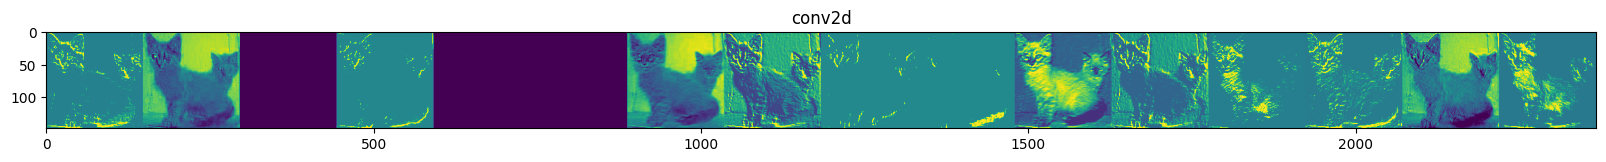

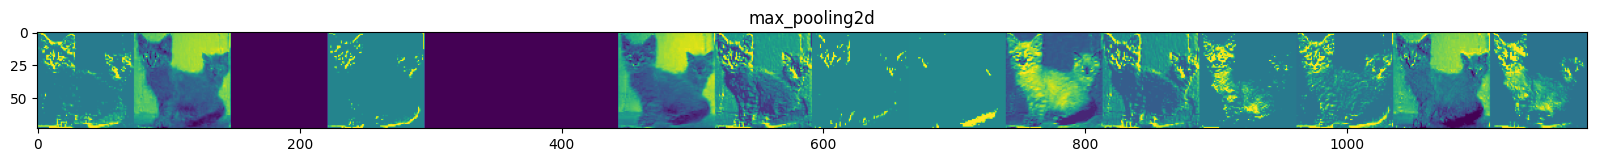

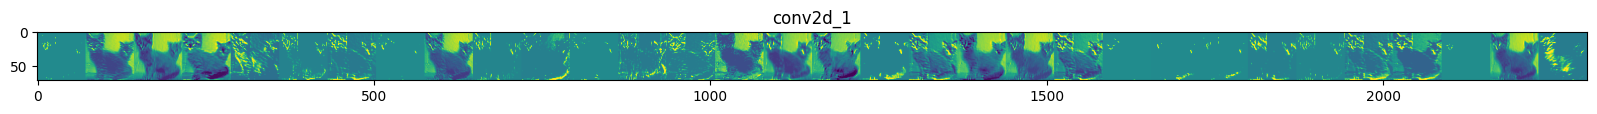

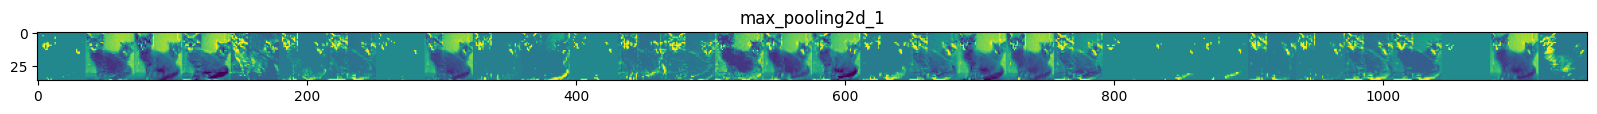

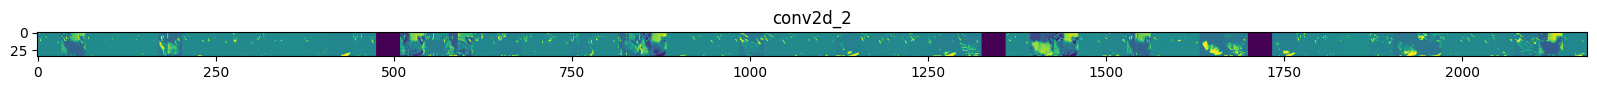

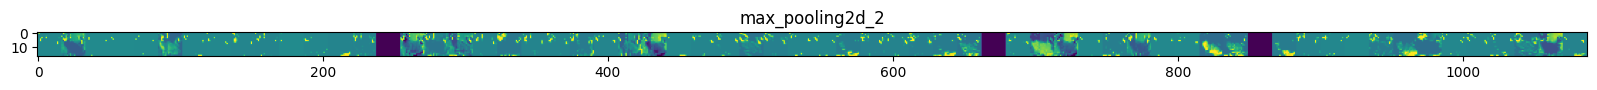

In [12]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs=model.input,
                                            outputs=successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1, ) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so we can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):

    if len(feature_map.shape) == 4:

        #-------------------------------------------
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        #-------------------------------------------
        n_features = feature_map.shape[
            -1]  # number of features in the feature map
        size = feature_map.shape[
            1]  # feature map shape (1, size, size, n_features)

        # Tile the images in this matrix
        display_grid = np.zeros((size, size * n_features))

        #-------------------------------------------------
        # Postprocess the feature to be visually palatable
        #-------------------------------------------------
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size:(i + 1) *
                         size] = x  # Tile each filter into a horizontal grid

        #-----------------
        # Display the grid
        #-----------------
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')


In [13]:
import numpy as np

#from google.colab import files
import keras.utils as image

#uploaded=files.upload()

#for fn in uploaded.keys():
fn = 'dog.2002.jpg'  # change it to your image file
# predicting images
path = 'cats_and_dogs_filtered/validation/dogs/dog.2002.jpg'  # change it to your image
img = image.load_img(path, target_size=(150, 150))

x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)

print(classes[0])

if classes[0] > 0.5:
    print(fn + " is a dog")
else:
    print(fn + " is a cat")


1/1 [==============================] - 0s 118ms/step
[0.99997497]
dog.2002.jpg is a dog


Text(0.5, 1.0, 'Training and validation loss')

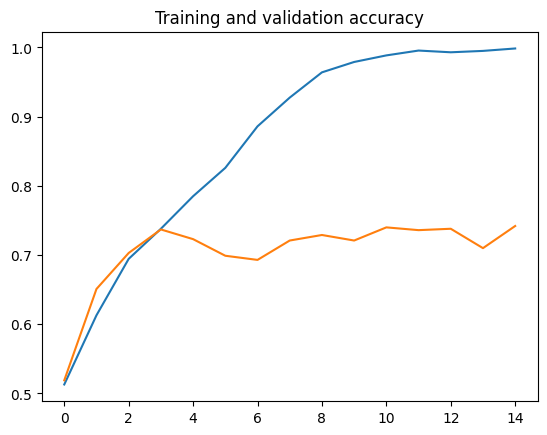

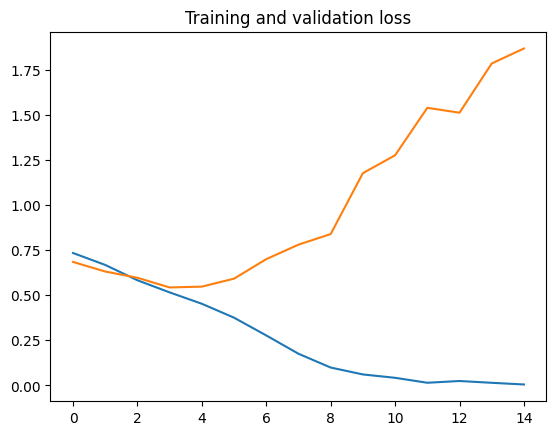

In [14]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))  # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')


### Ví dụ 2. Phân loại ảnh Chó – Mèo – Gấu trúc bằng CNN sử dụng thư viện Keras TensorFlow.


In [15]:
!wget https://dl.dropboxusercontent.com/s/xzn7cn8wrum34z0/CNN_MultiClass_data.zip
!unzip -q CNN_MultiClass_data.zip

--2023-04-11 16:33:49--  https://dl.dropboxusercontent.com/s/xzn7cn8wrum34z0/CNN_MultiClass_data.zip
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.71.15, 2620:100:6021:15::a27d:410f
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.71.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 393972330 (376M) [application/zip]
Saving to: ‘CNN_MultiClass_data.zip’

CNN_MultiClass_data 100%[===================>] 375.72M  19.2MB/s    in 20s     

2023-04-11 16:34:11 (18.8 MB/s) - ‘CNN_MultiClass_data.zip’ saved [393972330/393972330]



In [16]:
import tensorflow as tf  # Thư viện tensor.flow
from tensorflow import keras  # Lớp keras và các công cụ liên quan
import tensorflow_datasets as tfds  # Gọi và xử lý dữ liệu (với label là tên folder chứa dữ liệu)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [17]:
#!pip install tensorflow_datasets

import os
import numpy as np  # linear algebra
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import PIL
import PIL.Image
from tensorflow import keras
import tensorflow_datasets as tfds

In [18]:
# Trains a model to classify images of 3 classes: cat, dog, and panda
def gen_model():

    # Defines & compiles the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3, 3),
                               activation='relu',
                               input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        keras.layers.Dropout(
            rate=0.15
        ),  #adding dropout regularization throughout the model to deal with overfitting
        # The second convolution
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        keras.layers.Dropout(rate=0.1),
        # The third convolution
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        keras.layers.Dropout(rate=0.10),
        # Flatten the results to feed into a DNN
        tf.keras.layers.Flatten(),
        # 512 neuron hidden layer
        tf.keras.layers.Dense(512, activation='relu'),

        # 3 output neuron for the 3 classes of Animal Images
        tf.keras.layers.Dense(3, activation='softmax')
    ])

    from tensorflow.keras.optimizers import RMSprop

    model.compile(loss='categorical_crossentropy',
                  optimizer="adam",
                  metrics=['acc'])
    return model

In [19]:
# Trains a model to classify images of 3 classes: cat, dog, and panda
def train_test_animals():
    # Creates an instance of an ImageDataGenerator called train_datagen, and a train_generator, train_datagen.flow_from_directory

    from tensorflow.keras.preprocessing.image import ImageDataGenerator

    #splits data into training and testing(validation) sets
    train_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.25)

    import matplotlib.pyplot as plt

    #training data
    train_generator = train_datagen.flow_from_directory(
        'CNN_MultiClass_data/animals',
        # Source directory
        target_size=(150, 150),  # Resizes images
        batch_size=15,
        class_mode='categorical',
        subset='training')
    epochs = 2

    #Testing data
    validation_generator = train_datagen.flow_from_directory(
        'CNN_MultiClass_data/validation',
        target_size=(150, 150),
        batch_size=15,
        class_mode='categorical',
        subset='validation')  # set as validation data
    model = gen_model()
    #Model fitting for a number of epochs
    history = model.fit_generator(train_generator,
                                  steps_per_epoch=150,
                                  epochs=epochs,
                                  validation_data=validation_generator,
                                  validation_steps=50,
                                  verbose=1)

    acc = history.history['acc']
    val_acc = history.history['val_acc']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    #This code is used to plot the training and validation accuracy
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # returns accuracy of training
    print("Training Accuracy:"), print(history.history['acc'][-1])
    print("Testing Accuracy:"), print(history.history['val_acc'][-1])


Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Epoch 1/2


<ipython-input-19-b5533af92866>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


150/150 [==============================] - 16s 90ms/step - loss: 0.8830 - acc: 0.5400 - val_loss: 0.8114 - val_acc: 0.5507
Epoch 2/2
150/150 [==============================] - 13s 88ms/step - loss: 0.6991 - acc: 0.6458 - val_loss: 0.7019 - val_acc: 0.6507


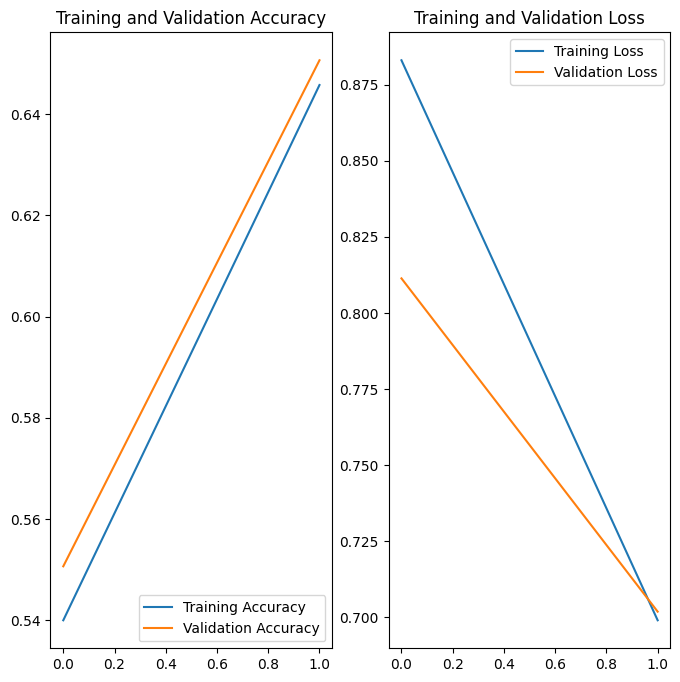

Training Accuracy:
0.6457777619361877
Testing Accuracy:
0.6506666541099548


In [20]:
train_test_animals()